In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

In [77]:
cost_of_living_df = pd.read_csv("./cost_of_living_data.csv",index_col="City",
                                encoding="utf-8")
#cost_of_living_df.columns

In [3]:
glassdoor_job_title_df = pd.read_csv("./glassdoor_job_title_data.csv",
                                encoding="utf-8")

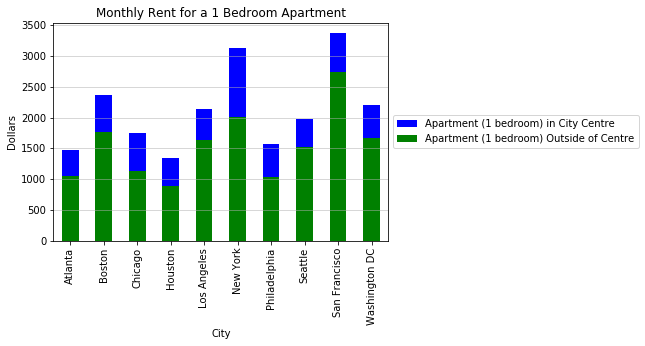

In [123]:
# Alternative plotting method
# x_axis = np.arange(len(cost_of_living_df.index))
# y_values = cost_of_living_df['Apartment (1 bedroom) in City Centre'].astype(float)
# plt.bar(x_axis, y_values, 
#         color='b', alpha=0.5, align="center")
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, cost_of_living_df.index, rotation="vertical")
# plt.ylim(0, max(y_values)+500)
# plt.xlabel("City")
# plt.ylabel("Apartment (1 bedroom) in City Centre")
# plt.show()

ax = plt.gca()
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) in City Centre',color='b',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (1 bedroom) Outside of Centre',color='g',ax=ax)
plt.xlabel("City")
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.grid(linewidth=0.5)
plt.title("Monthly Rent for a 1 Bedroom Apartment")
plt.show()

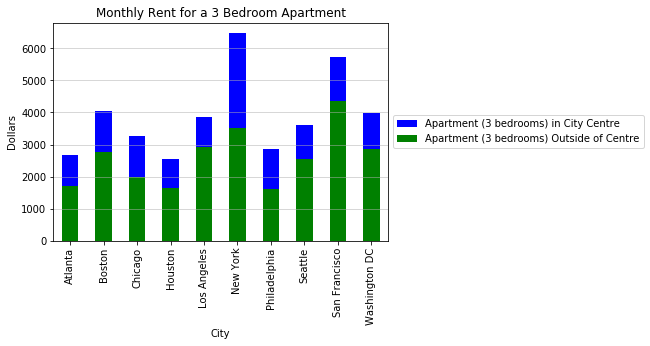

In [76]:
ax = plt.gca()
cost_of_living_df.plot(kind='bar',y='Apartment (3 bedrooms) in City Centre',color='b',ax=ax)
cost_of_living_df.plot(kind='bar',y='Apartment (3 bedrooms) Outside of Centre',color='g',ax=ax)
plt.xlabel("City")
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.yaxis.grid(linewidth=0.5)
plt.title("Monthly Rent for a 3 Bedroom Apartment")
plt.show()

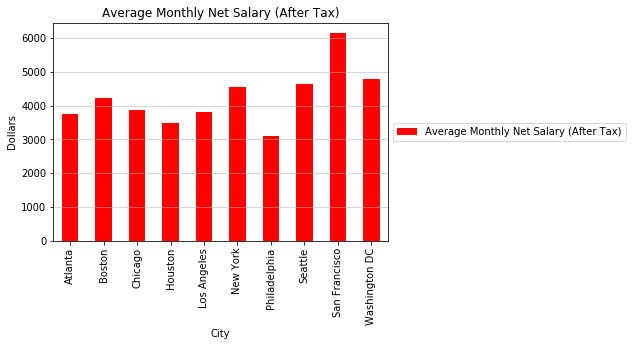

In [131]:
cost_of_living_df.plot(kind='bar',y='Average Monthly Net Salary (After Tax)',color='r')
plt.ylabel("Dollars")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y',linewidth=0.5)
plt.title("Average Monthly Net Salary (After Tax)")
plt.show()

In [149]:
glassdoor_job_title_df.head()

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY,mnth,yr
0,National,Job Title,2017-06,Software Engineer,Median Base Pay,85880.0,0.028,6,2017
1,National,Job Title,2017-06,Programmer Analyst,Median Base Pay,67889.0,0.026,6,2017
2,National,Job Title,2017-06,Consultant,Median Base Pay,71306.0,0.006,6,2017
3,National,Job Title,2017-06,Project Manager,Median Base Pay,72571.0,0.004,6,2017
4,National,Job Title,2017-06,Store Manager,Median Base Pay,48199.0,0.028,6,2017


In [47]:
#glassdoor_job_title_df["Measure"].unique()
#glassdoor_job_title_df["Month"].unique()
# Number of job titles
#print("There's {0} job titles in the Glassdoor dataset.".format(glassdoor_job_title_df["Dimension"].nunique()))
#glassdoor_job_title_df["Dimension"].unique()

There's 85 job titles in the Glassdoor dataset.


In [73]:
# what job titles have highest median base pay in which location
# glassdoor_job_title_df.groupby(["yr","Dimension"]).apply(lambda x: (x.groupby('Metro')
#                                       .mean()
#                                       .sort_values('Value', ascending=False))
#                                      .head(11))['Value']
glassdoor_job_title_2019 = glassdoor_job_title_df[glassdoor_job_title_df["yr"]==2019]
df = glassdoor_job_title_2019.groupby(["Dimension"]).apply(lambda x: (x.groupby('Metro')
                                      .mean()
                                      .sort_values('Value', ascending=False))
                                     .head(11))['Value']
df["Project Manager"]

Metro
San Francisco    94596.0
Washington DC    87141.0
New York City    85885.0
Seattle          84159.5
Los Angeles      83710.5
Houston          81981.5
Boston           81736.5
Chicago          78871.0
Atlanta          77736.0
Philadelphia     76821.0
National         71752.5
Name: Value, dtype: float64

In [50]:
# Created a column with Date object for plotting purposes
glassdoor_job_title_df['Date'] = [datetime.strptime(month, '%Y-%m') for month in glassdoor_job_title_df['Month']]
#glassdoor_job_title_df.head()

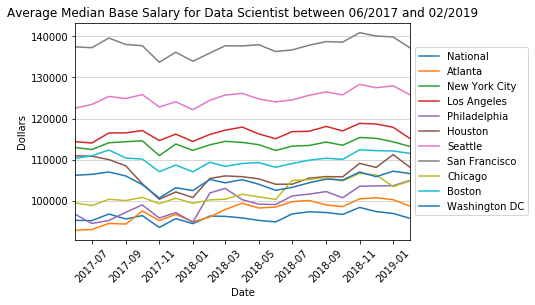

In [57]:
#timeseries for <job title> and <location>
job_title_interest = "Data Scientist"
#job_title_interest = "Accountant"

job_df = glassdoor_job_title_df[glassdoor_job_title_df['Dimension']==job_title_interest]
#job_df_group = job_df.groupby(["Metro"])['Value']
#job_df_group.plot()
fig, ax = plt.subplots()
for metro in job_df["Metro"].unique():
    df = job_df[job_df["Metro"]==metro]
    plt.plot(df["Date"],df["Value"],label=metro)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.xlim(min(df["Date"]),max(df["Date"]))
plt.ylabel("Dollars")
plt.grid(axis='y',linewidth=0.5)
plt.title("Average Median Base Salary for {0} between 06/2017 and 02/2019".format(job_title_interest))
plt.show()

In [206]:
# top five job titles with highest median base pay
top_five = glassdoor_job_title_df.groupby(["Metro","yr"]).apply(lambda x: (x.groupby('Dimension')
                                      .mean()
                                      .sort_values('Value', ascending=False))
                                     .head(5))['Value']

In [230]:
# top five job titles with highest median base pay in Chicago 2017-2019
top_five['Chicago']

yr    Dimension          
2017  Pharmacist             120487.285714
      Solutions Architect    109848.857143
      Attorney               106832.714286
      Tax Manager            103066.571429
      Data Scientist          99965.857143
2018  Pharmacist             120629.416667
      Attorney               113901.666667
      Solutions Architect    113249.916667
      Tax Manager            104378.833333
      Data Scientist         103068.333333
2019  Pharmacist             121928.000000
      Solutions Architect    116839.500000
      Attorney               112117.000000
      Data Scientist         104176.500000
      Tax Manager            103218.000000
Name: Value, dtype: float64

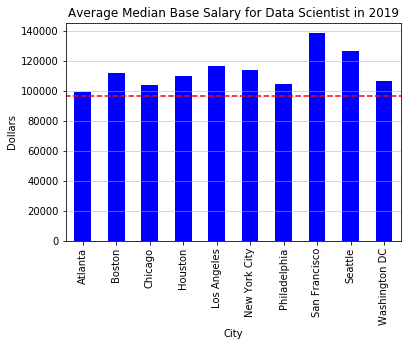

In [246]:
# Average median base salary for <job title> in <year> 
job_title_interest = 'Data Scientist'
year_interest = 2019

national = job_year_location[job_title_interest][year_interest]['National']
job_year_location_new = job_year_location[job_title_interest][year_interest].drop('National')
#job_year_location[job_title_interest][year_interest].plot(kind="bar",color='b')
job_year_location_new.plot(kind="bar",color='b')
plt.xlabel("City")
plt.ylabel("Dollars")
plt.hlines(national,xmin=-1,xmax=10,colors='r',linestyles='dashed')
plt.grid(axis='y',linewidth=0.5)
plt.title("Average Median Base Salary for {0} in {1}".format(job_title_interest,year_interest))
plt.show()